# 1. Finding the most specific/general hypothesis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


## Creating the Data Set



In [2]:
#Generating target variable y

def gen_target(n):

    data_y = []

    for i in range(int(n/2)):
        data_y.append(1)
        data_y.append(0)

    data_y = np.array(data_y)
    np.random.shuffle(data_y)
    data_y = data_y.reshape(n,1)
    return data_y

n = 30

data_y = gen_target(n)
data_y

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [3]:
#Generating feature variable X:

def gen_features():
    data_x = []

    for i in range(n):
        if data_y[i] == 1:
            x1 = np.random.uniform(2,7)
            x2 = np.random.uniform(4,6)
        else:
            x1 = np.random.choice(np.union1d(np.random.uniform(0,2,1000), np.random.uniform(7,9,1000)))
            x2 = np.random.choice(np.union1d(np.random.uniform(1,3,1000), np.random.uniform(6,8,1000)))

        x = [x1, x2]
        data_x.append(x) 

    data_x = np.array(data_x)
    return data_x

data_x = gen_features()
data_x

array([[7.5631074 , 7.77808794],
       [2.08249204, 5.76682681],
       [1.12289935, 1.4778052 ],
       [4.270946  , 4.31482359],
       [4.43323818, 4.30500733],
       [7.96425042, 1.22766809],
       [3.62689244, 4.55105916],
       [0.7215777 , 6.02183343],
       [0.38816189, 2.47946982],
       [6.84016297, 4.68560173],
       [0.4932328 , 2.09582692],
       [4.78959084, 4.43167684],
       [8.82778338, 6.88430179],
       [1.2606123 , 7.5554103 ],
       [1.60077227, 2.79721029],
       [1.16180277, 1.03915669],
       [2.05909052, 4.87862895],
       [1.06438407, 2.67853089],
       [7.82265054, 6.95605213],
       [5.5314594 , 5.53768923],
       [1.13714207, 6.84473041],
       [3.01642947, 5.20391349],
       [5.8070693 , 5.5215958 ],
       [6.6500375 , 4.29005684],
       [4.43173416, 4.9196478 ],
       [2.44627915, 4.71811583],
       [0.59524043, 2.17945499],
       [2.33892985, 5.64706668],
       [4.25231858, 4.29267679],
       [7.33545859, 2.69570572]])

In [4]:
#Collecting those indices where 1. y = 1 and 2. y = 0
idx_1 = np.where(data_y == 1)
idx_0 = np.where(data_y == 0)

idx_1, data_y[idx_1]

((array([ 1,  3,  4,  6,  9, 11, 16, 19, 21, 22, 23, 24, 25, 27, 28]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

## 1. Plotting the Dataset

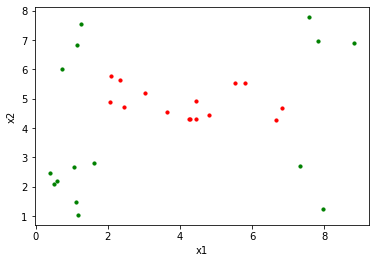

In [5]:
plt.scatter(data_x[idx_1[0]][:,0], data_x[idx_1[0]][:,1], s=10, c='r', marker="o", label='first')
plt.scatter(data_x[idx_0[0]][:,0], data_x[idx_0[0]][:,1], s=10, c='g', marker="o", label='second')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

#2. Hypothesis Class: Rectangle

##2.1 Most Specific Hypothesis

In [7]:
data_x[idx_1[0]]

array([[2.08249204, 5.76682681],
       [4.270946  , 4.31482359],
       [4.43323818, 4.30500733],
       [3.62689244, 4.55105916],
       [6.84016297, 4.68560173],
       [4.78959084, 4.43167684],
       [2.05909052, 4.87862895],
       [5.5314594 , 5.53768923],
       [3.01642947, 5.20391349],
       [5.8070693 , 5.5215958 ],
       [6.6500375 , 4.29005684],
       [4.43173416, 4.9196478 ],
       [2.44627915, 4.71811583],
       [2.33892985, 5.64706668],
       [4.25231858, 4.29267679]])

In [8]:
cl_min = np.min(data_x[idx_1[0]], axis=0)
cl_min

array([2.05909052, 4.29005684])

In [9]:
cl_max = np.max(data_x[idx_1[0]], axis=0)
cl_max

array([6.84016297, 5.76682681])

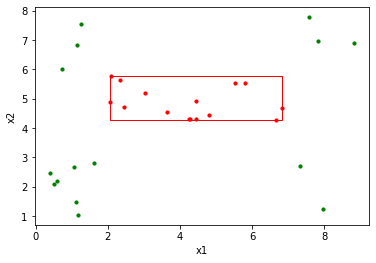

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data_x[idx_1[0]][:,0], data_x[idx_1[0]][:,1], s=10, c='r', marker="o", label='first')
plt.scatter(data_x[idx_0[0]][:,0], data_x[idx_0[0]][:,1], s=10, c='g', marker="o", label='second')
rec = patches.Rectangle(cl_min, cl_max[0]-cl_min[0], cl_max[1]-cl_min[1], linewidth=1, edgecolor='r', facecolor='None')
ax.add_patch(rec)
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

##2.2 Most General Hypothesis

In [23]:
data_x[idx_0[0]]

array([[7.5631074 , 7.77808794],
       [1.12289935, 1.4778052 ],
       [7.96425042, 1.22766809],
       [0.7215777 , 6.02183343],
       [0.38816189, 2.47946982],
       [0.4932328 , 2.09582692],
       [8.82778338, 6.88430179],
       [1.2606123 , 7.5554103 ],
       [1.60077227, 2.79721029],
       [1.16180277, 1.03915669],
       [1.06438407, 2.67853089],
       [7.82265054, 6.95605213],
       [1.13714207, 6.84473041],
       [0.59524043, 2.17945499],
       [7.33545859, 2.69570572]])

In [33]:
val1 = data_x[idx_0[0]][:,0]
val2 = data_x[idx_0[0]][:,1]
val1, val2

(array([7.5631074 , 1.12289935, 7.96425042, 0.7215777 , 0.38816189,
        0.4932328 , 8.82778338, 1.2606123 , 1.60077227, 1.16180277,
        1.06438407, 7.82265054, 1.13714207, 0.59524043, 7.33545859]),
 array([7.77808794, 1.4778052 , 1.22766809, 6.02183343, 2.47946982,
        2.09582692, 6.88430179, 7.5554103 , 2.79721029, 1.03915669,
        2.67853089, 6.95605213, 6.84473041, 2.17945499, 2.69570572]))

In [42]:
x1 = val1[val1 <= 2].max()
x2 = val2[val2 <= 3].max()

height = val2[val2 >= 6].max() - val2[val2 <= 3].max()
width = val1[val1 >= 7].min() - val1[val1 <= 2].max()

(x1,x2), height, width

((1.6007722695660056, 2.79721028775626), 4.980877650444995, 5.73468632071503)

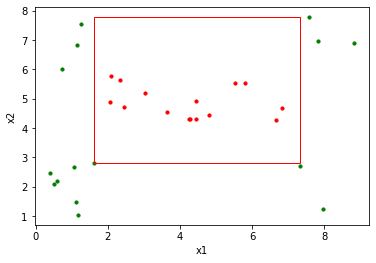

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data_x[idx_1[0]][:,0], data_x[idx_1[0]][:,1], s=10, c='r', marker="o", label='first')
plt.scatter(data_x[idx_0[0]][:,0], data_x[idx_0[0]][:,1], s=10, c='g', marker="o", label='second')
rec = patches.Rectangle([x1,x2], width, height, linewidth=1, edgecolor='r', facecolor='None')
ax.add_patch(rec)
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

#3. Hypothesis Class: Circle

##3.1 Most Specific Hypothesis

In [45]:
data_x[idx_1[0]]

array([[2.08249204, 5.76682681],
       [4.270946  , 4.31482359],
       [4.43323818, 4.30500733],
       [3.62689244, 4.55105916],
       [6.84016297, 4.68560173],
       [4.78959084, 4.43167684],
       [2.05909052, 4.87862895],
       [5.5314594 , 5.53768923],
       [3.01642947, 5.20391349],
       [5.8070693 , 5.5215958 ],
       [6.6500375 , 4.29005684],
       [4.43173416, 4.9196478 ],
       [2.44627915, 4.71811583],
       [2.33892985, 5.64706668],
       [4.25231858, 4.29267679]])

In [46]:
cl_min = np.min(data_x[idx_1[0]], axis=0)
cl_max = np.max(data_x[idx_1[0]], axis=0)

cl_min, cl_max

(array([2.05909052, 4.29005684]), array([6.84016297, 5.76682681]))

In [47]:
x1 = (cl_min[0] + cl_max[0])/2
x2 = (cl_min[1] + cl_max[1])/2

radius = max((cl_max[0]-cl_min[0])/2, (cl_max[1]-cl_min[1])/2)

(x1,x2), radius

((4.449626743951436, 5.028441823685085), 2.3905362215860464)

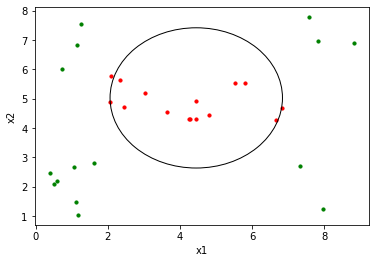

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data_x[idx_1[0]][:,0], data_x[idx_1[0]][:,1], s=10, c='r', marker="o", label='first')
plt.scatter(data_x[idx_0[0]][:,0], data_x[idx_0[0]][:,1], s=10, c='g', marker="o", label='second')
cir = plt.Circle((x1,x2), radius, fill=False)
ax.add_artist(cir)
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

##3.2 Most General Hypothesis

In [52]:
data_x[idx_0[0]]

array([[7.5631074 , 7.77808794],
       [1.12289935, 1.4778052 ],
       [7.96425042, 1.22766809],
       [0.7215777 , 6.02183343],
       [0.38816189, 2.47946982],
       [0.4932328 , 2.09582692],
       [8.82778338, 6.88430179],
       [1.2606123 , 7.5554103 ],
       [1.60077227, 2.79721029],
       [1.16180277, 1.03915669],
       [1.06438407, 2.67853089],
       [7.82265054, 6.95605213],
       [1.13714207, 6.84473041],
       [0.59524043, 2.17945499],
       [7.33545859, 2.69570572]])

In [53]:
val1 = data_x[idx_0[0]][:,0]
val2 = data_x[idx_0[0]][:,1]
val1, val2

(array([7.5631074 , 1.12289935, 7.96425042, 0.7215777 , 0.38816189,
        0.4932328 , 8.82778338, 1.2606123 , 1.60077227, 1.16180277,
        1.06438407, 7.82265054, 1.13714207, 0.59524043, 7.33545859]),
 array([7.77808794, 1.4778052 , 1.22766809, 6.02183343, 2.47946982,
        2.09582692, 6.88430179, 7.5554103 , 2.79721029, 1.03915669,
        2.67853089, 6.95605213, 6.84473041, 2.17945499, 2.69570572]))

In [60]:
x1 = val1[val1 <= 2].max()
x2 = val2[val2 <= 3].max()

height = val2[val2 >= 6].max() - val2[val2 <= 3].max()
width = val1[val1 >= 7].min() - val1[val1 <= 2].max()

x1 += width/2
x2 += height/2

radius = max(height/2, width/2)
(x1,x2), radius, width, height

((4.46811542992352, 5.287649112978757),
 2.867343160357515,
 5.73468632071503,
 4.980877650444995)

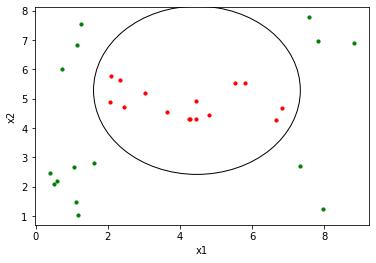

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data_x[idx_1[0]][:,0], data_x[idx_1[0]][:,1], s=10, c='r', marker="o", label='first')
plt.scatter(data_x[idx_0[0]][:,0], data_x[idx_0[0]][:,1], s=10, c='g', marker="o", label='second')
cir = plt.Circle((x1,x2), radius, fill=False)
ax.add_artist(cir)
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()